# Ngữ pháp của biểu đồ

Một trong những điểm yếu của Python so với R là hệ sinh thái biểu đồ của python không có đầy đủ và toàn diện khi so sánh với hệ sinh thái của ggplot2. Với `lets-plot` và `plotnine`, ta có thể chuyển đổi một cách nhanh chóng các biểu đồ từ R sang Python. 

Thêm vào đó, `lets_plot`, cho phép xây dựng biểu đồ:

- Áp dụng theo nguyên lý ngữ pháp của biểu đồ
- Cho phép xây dựng biểu đồ động (interactive, hỗ trợ hover)
- Cho phép chuyển đổi các biểu đồ cơ bản từ ggplot2 sang python đơn giản

Tuy nhiên, lets_plot mới chỉ hỗ trợ 1 phần tương thích với ggplot2. Với `plotnine`, hỗ trợ phần lớn biểu đồ tương tự như `ggplot2`, thêm vào đó, nhóm biểu đồ được xây dựng với `plotnine` có thể kết hợp được với nhau rất linh động với `patchworklib`

**Lưu ý**: Để xem thêm các nguyên lý về ngữ pháp biểu đồ, có thể tham khảo thêm tại [ggplot2 tiếng Việt](https://anhhd.github.io/ds-book-r/p02-04-ngu-phap-bieu-do-ggplot2.html)

## lets-plot

Cài đặt `lets-plot` như sau

`!pip install lets-plot`

In [1]:
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

In [2]:
import numpy as np
from lets_plot import *
LetsPlot.setup_html()

np.random.seed(12)
data = dict(
    cond=np.repeat(['A', 'B'], 200),
    rating=np.concatenate((np.random.normal(0, 1, 200), np.random.normal(1, 1.5, 200)))
)

Ví dụ với `lets-plot` như ở dưới đây

In [3]:
ggplot(data, aes(x='rating', fill='cond')) + ggsize(700, 300) + \
    geom_density(color='dark_green', alpha=.7) + scale_fill_brewer(type='seq') + \
    theme(panel_grid_major_x='blank') + \
    labs(title = "Biểu đồ mật độ")

Tài liệu tham khảo thêm của `lets-plot` có thể tham khảo thêm tại
- [https://lets-plot.org/python/index.html]()

## Plotnine

`Plotnine` không hỗ trợ tương tác động như `lets-plot` nhưng lại tương thích và có đầy đủ phần lớn các biểu đồ từ `ggplot2`.

`!pip install plotnine`

In [4]:
import pandas as pd
from plotnine import (
    ggplot,
    aes,
    geom_boxplot,
    geom_jitter,
    scale_x_discrete,
    coord_flip,
    geom_point,
    theme_minimal,
    labs
)

In [5]:
data = pd.DataFrame({
    'x': [1, 2, 3, 2, 4],
    'y': [2, 4, 3, 1, 5]
})

In [6]:
data.__class__

pandas.core.frame.DataFrame

In [7]:
data.head

<bound method NDFrame.head of    x  y
0  1  2
1  2  4
2  3  3
3  2  1
4  4  5>

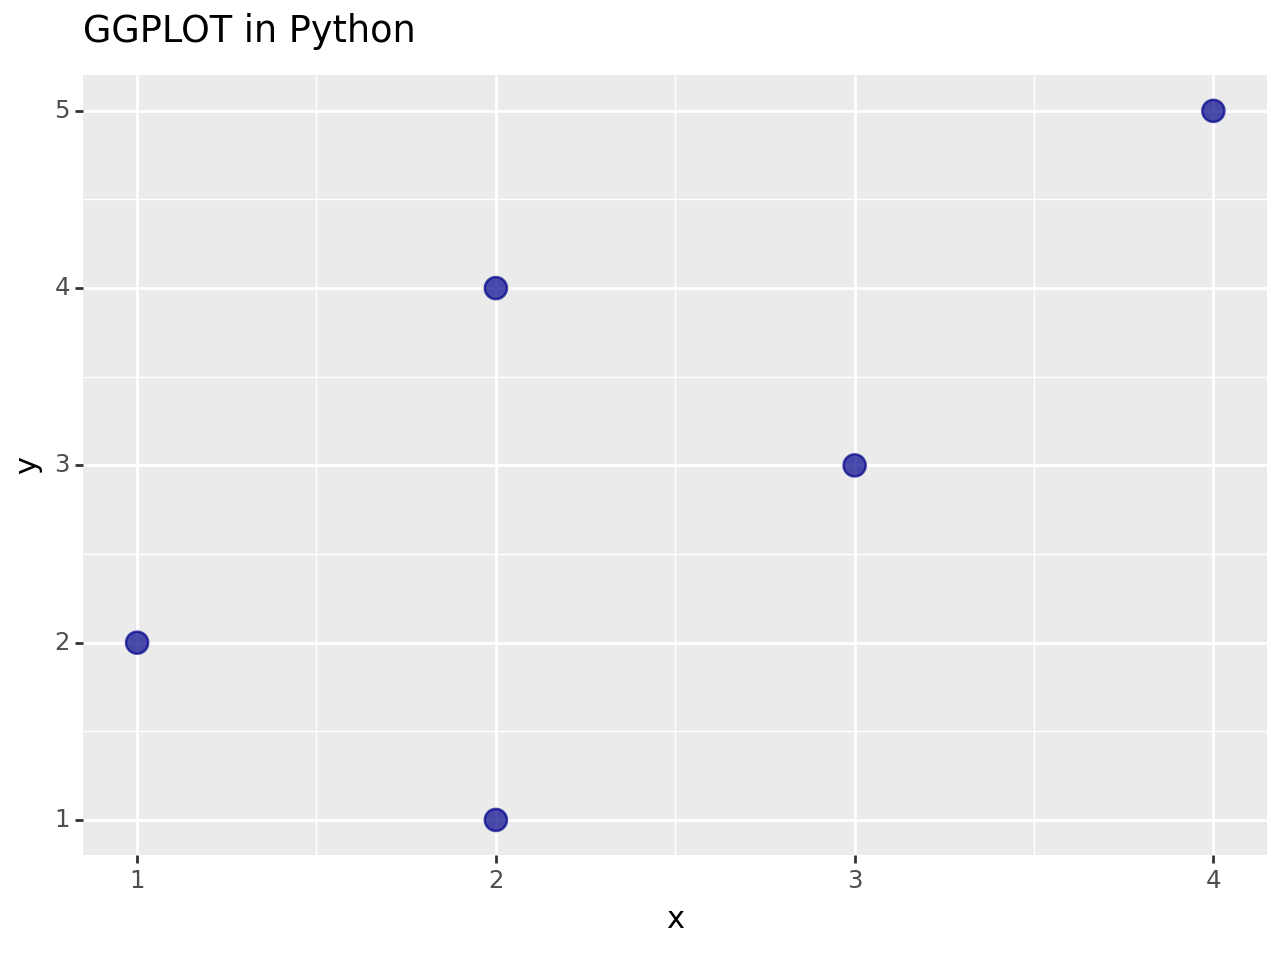

<Figure Size: (640 x 480)>

In [8]:
ggplot(data) + \
    geom_point(aes('x', 'y'), size = 4, color = "darkblue", alpha = 0.7) + \
    labs(title = "GGPLOT in Python")

## Kết hợp nhiều biểu đồ với patchworklib

Với `patchworklib`, ta có thể kết hợp các nhóm biểu đồ của plotnine, seaborn và matplotlib lại nhanh chóng.

**Lưu ý**: Với `plotnine`, `patchworklib` phiên bản 10/2023 mới có thể kết hợp biểu đồ được

In [9]:
import patchworklib as pw

<Figure size 100x100 with 0 Axes>

In [10]:
from plotnine.data import mtcars
from plotnine import *

In [11]:
mtcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


Ví dụ về sử dụng `patchworklib`

In [12]:
p1 = (ggplot(mtcars, aes("mpg", "cyl")) +\
    geom_point(aes(color = "factor(vs)"), size = 4) +\
    theme_minimal())
p2 = (ggplot(mtcars, aes("mpg", "disp")) \
        + geom_point(color = "darkblue", alpha = 0.3, size = 2) \
        + geom_smooth(color = "darkred") \
        + theme_minimal())
p3 = (ggplot(mtcars, aes("factor(vs)", "mpg")) \
     + geom_boxplot(aes(fill = "factor(vs)")) \
     + theme_minimal())

In [13]:
p1_new = pw.load_ggplot(p1)
p2_new = pw.load_ggplot(p2)
p3_new = pw.load_ggplot(p3)

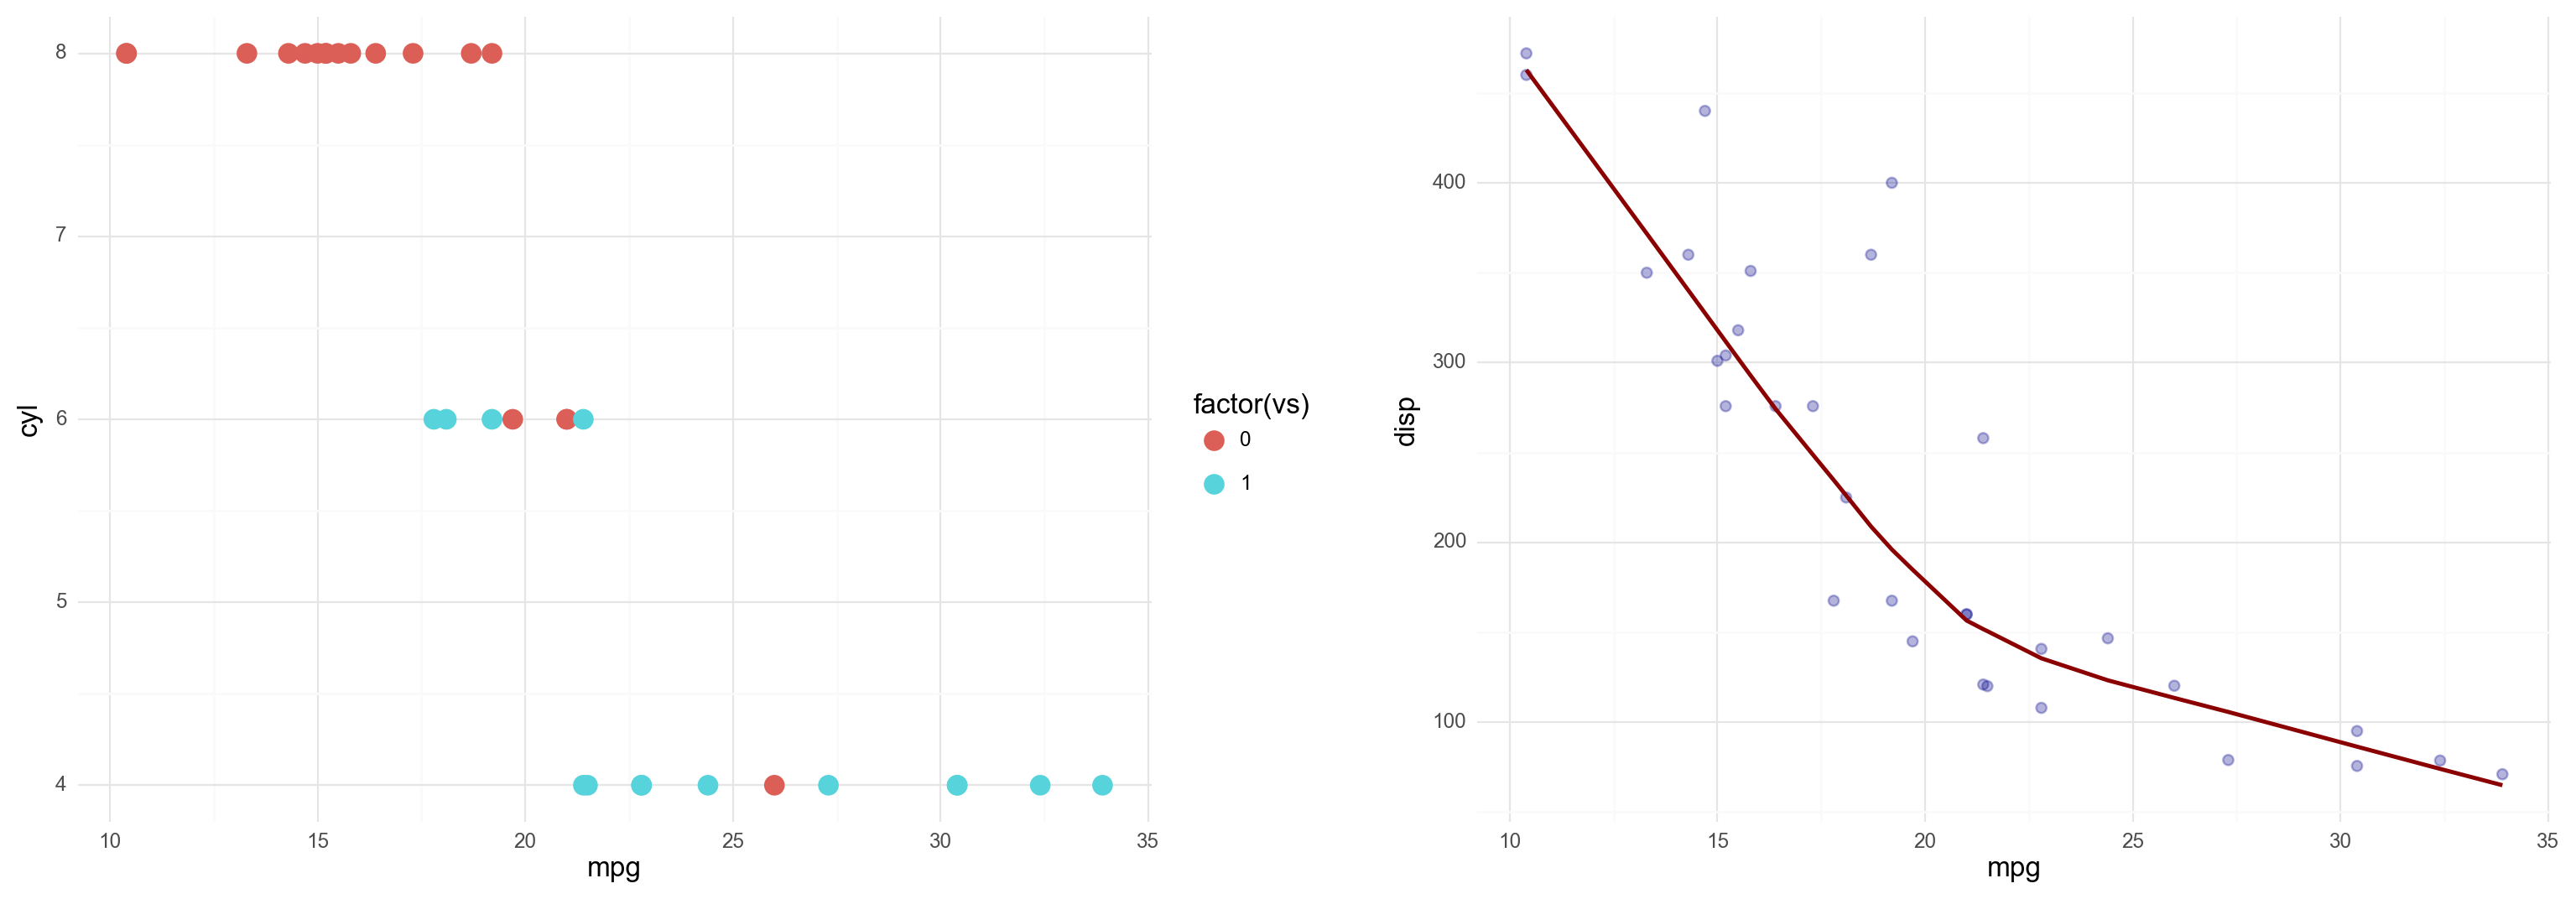

In [14]:
p1_new + p2_new

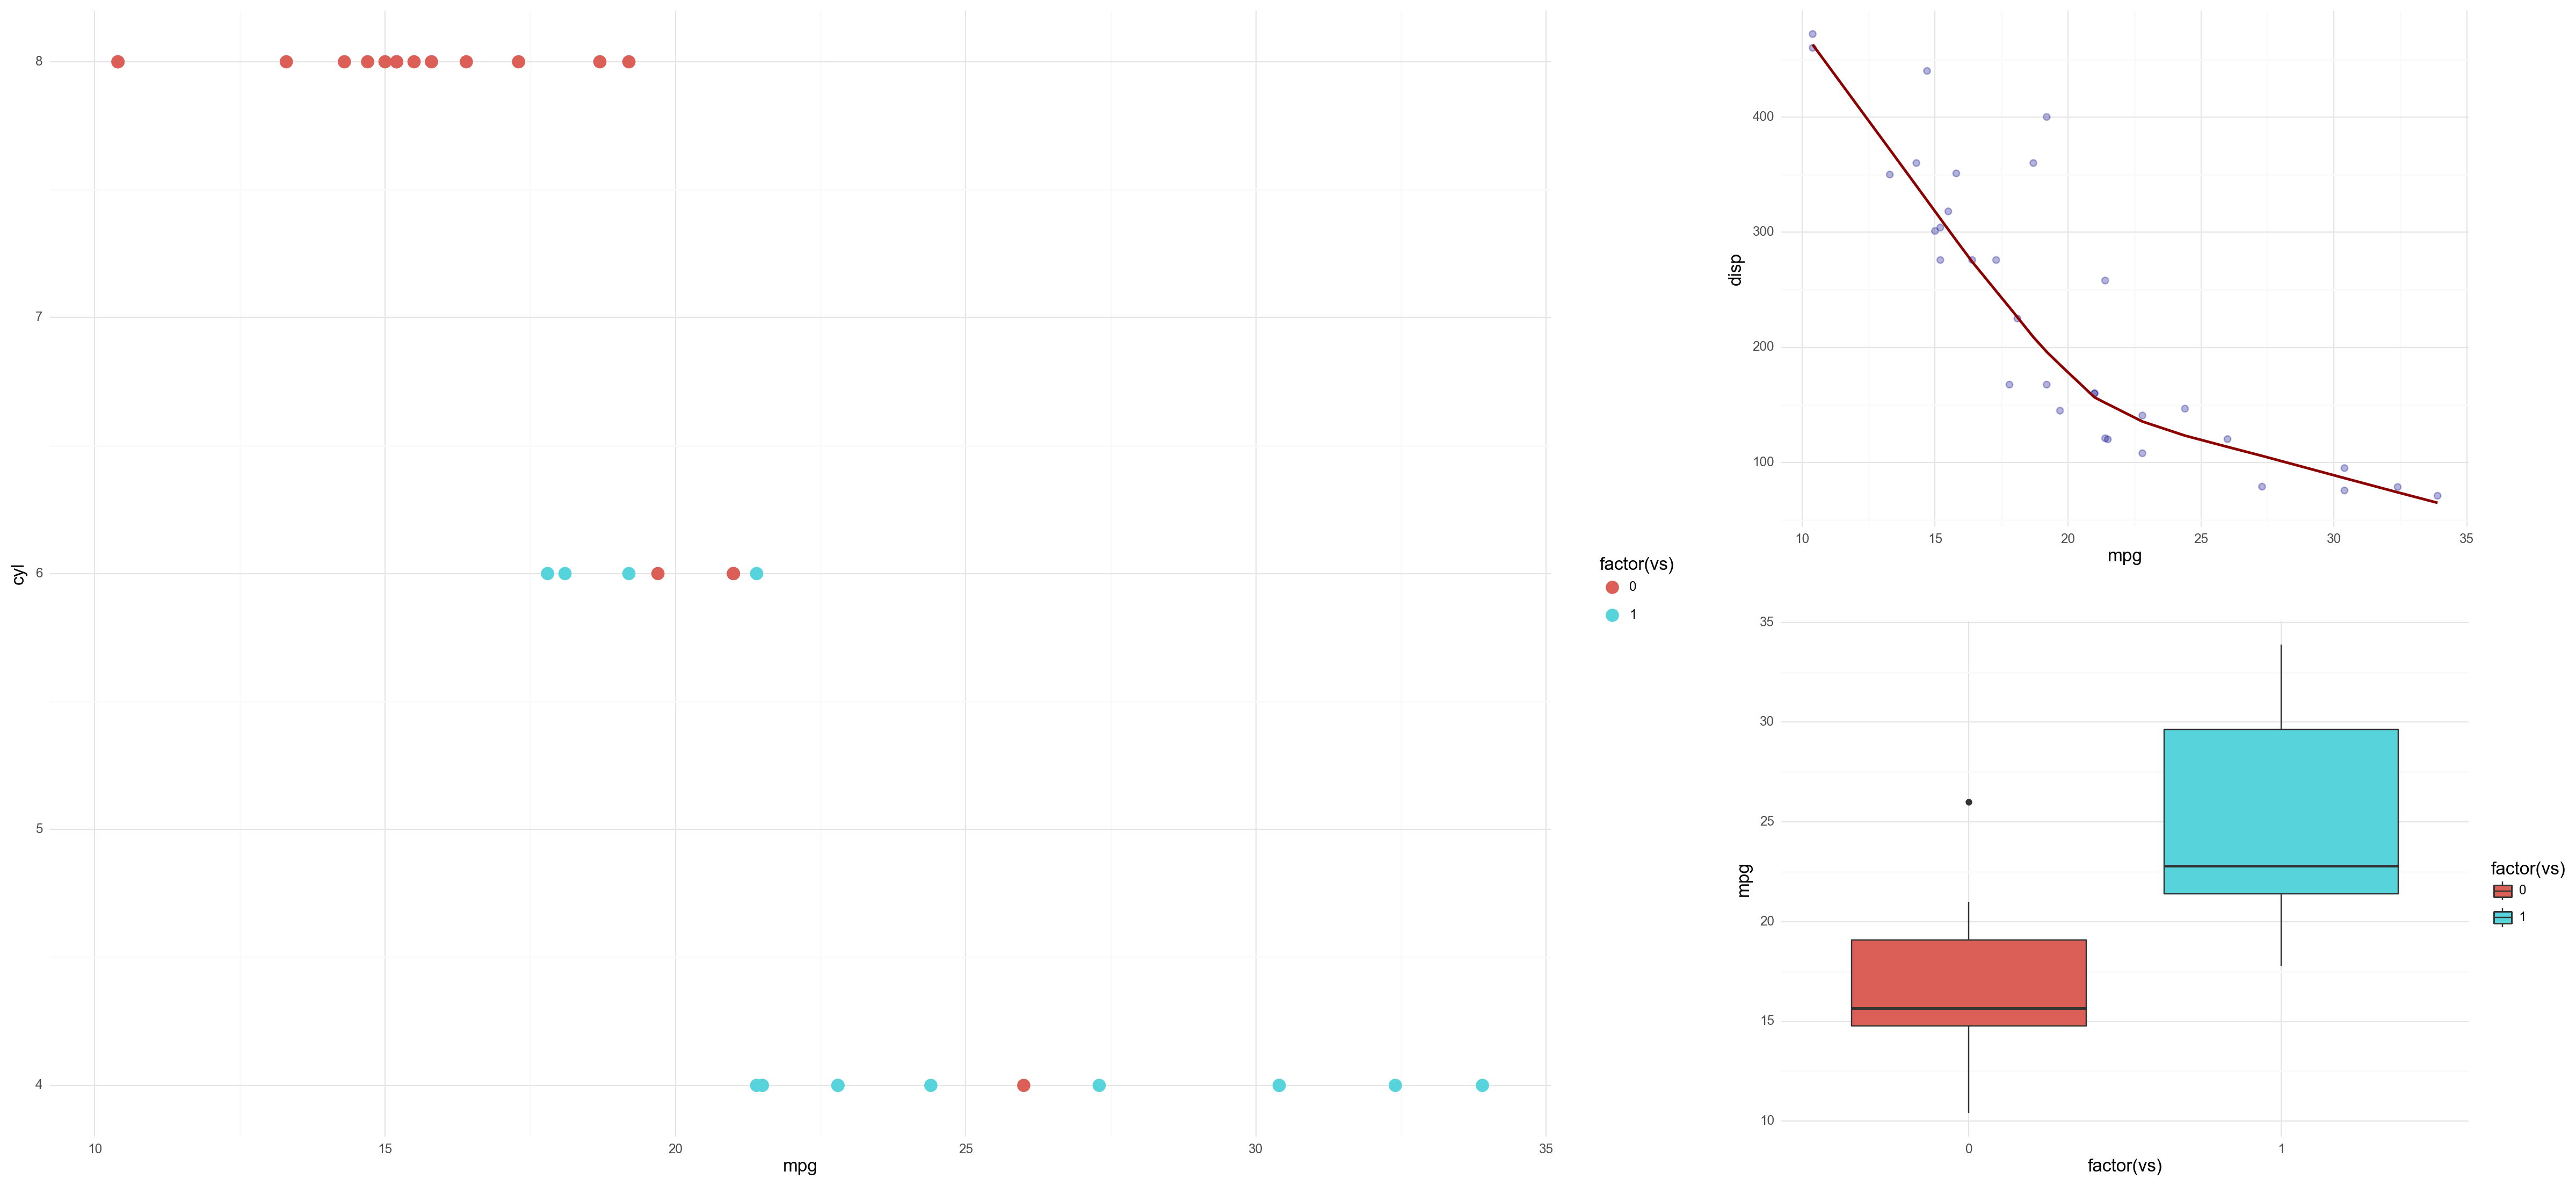

In [15]:
p1_new + (p2_new/p3_new)

---

Bên cạnh đó, `patchworklib` cũng cho phép tinh chỉnh kích cỡ của biểu đồ như sau.

In [16]:
p1 = (ggplot(mtcars, aes("mpg", "cyl")) +\
    geom_point(aes(color = "factor(vs)"), size = 4) +\
    theme_minimal())
p2 = (ggplot(mtcars, aes("mpg", "disp")) \
        + geom_point(color = "darkblue", alpha = 0.3, size = 2) \
        + geom_smooth(color = "darkred") \
        + theme_minimal())
p3 = (ggplot(mtcars, aes("factor(vs)", "mpg")) \
     + geom_boxplot(aes(fill = "factor(vs)")) \
     + theme_minimal())

p1_new = pw.load_ggplot(p1, figsize = (5,5))
p2_new = pw.load_ggplot(p2, figsize = (2,2))
p3_new = pw.load_ggplot(p3, figsize = (2,2))

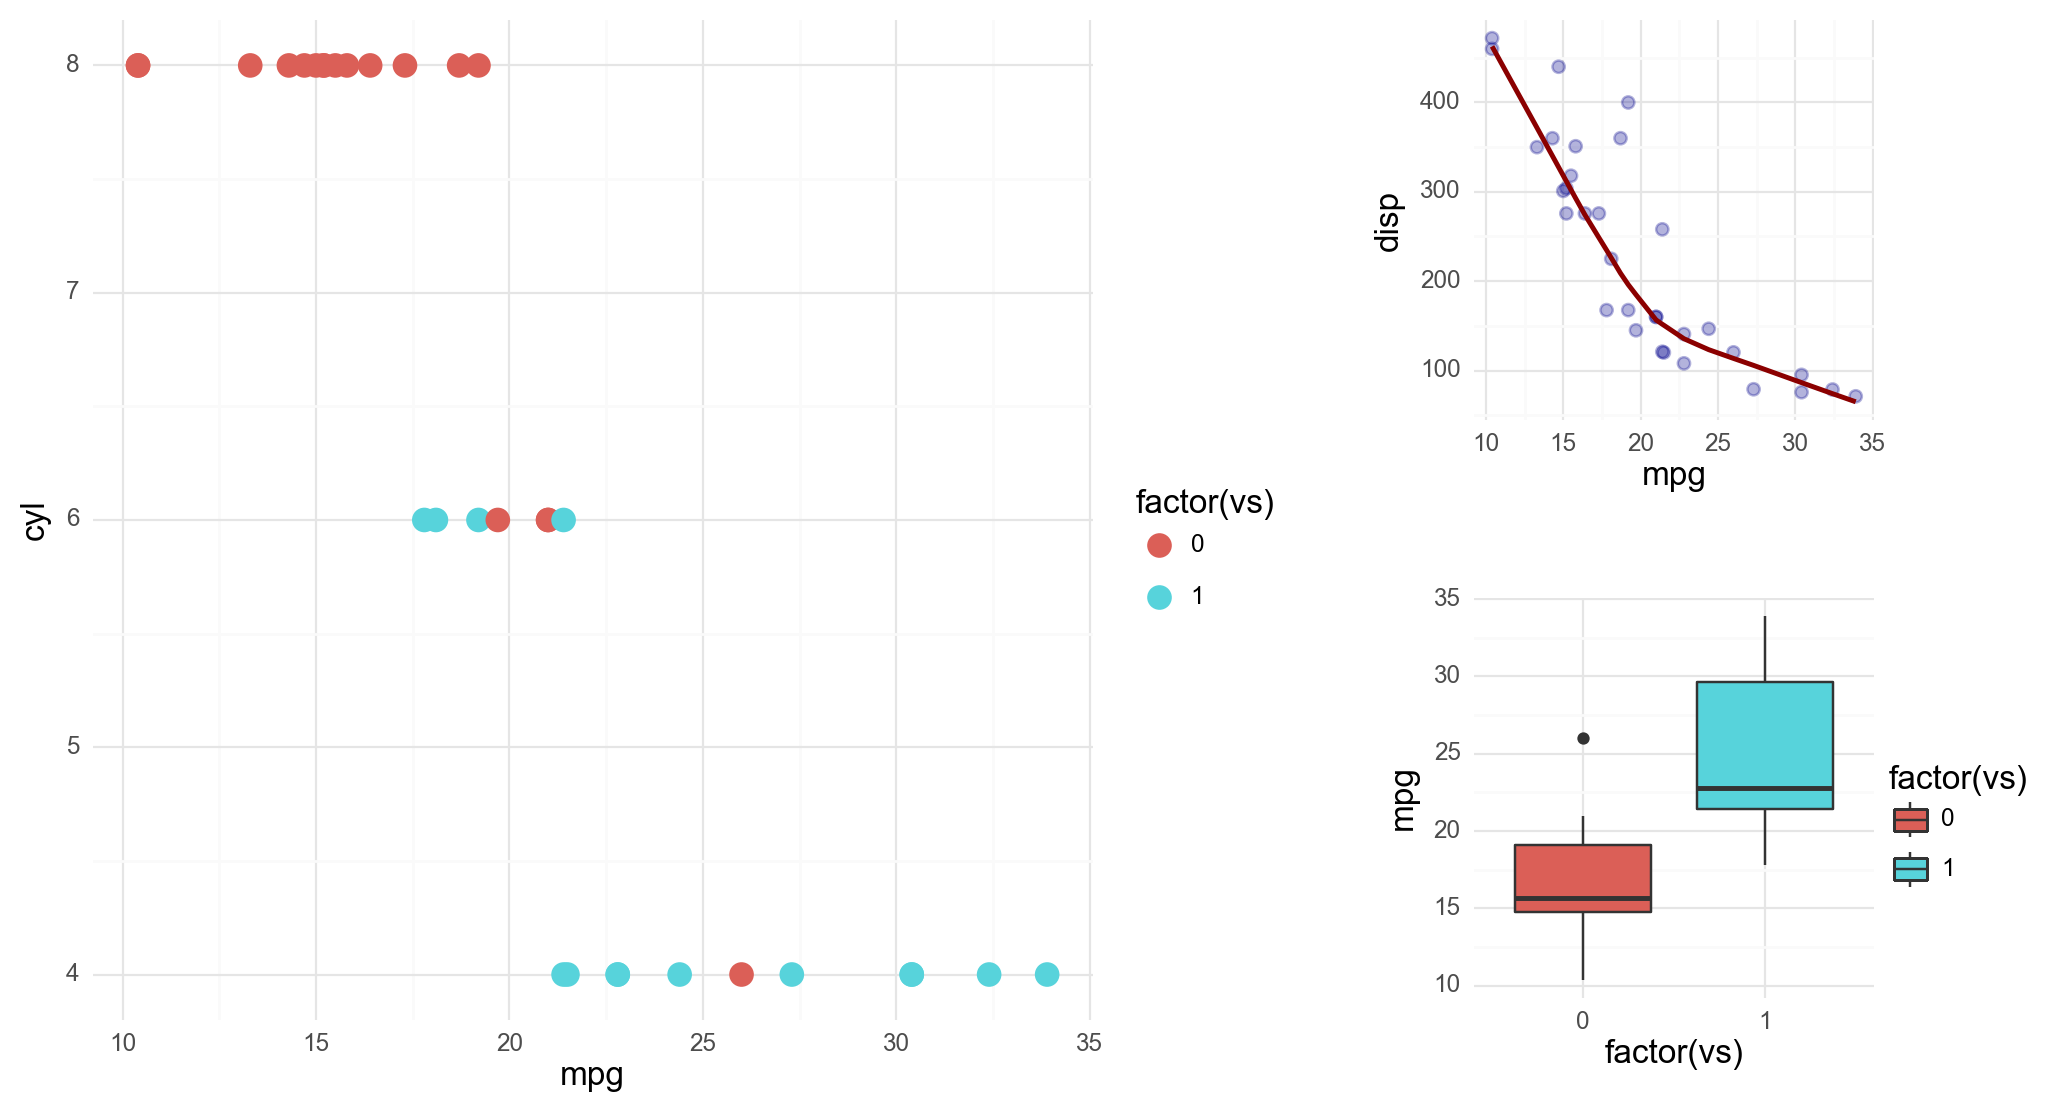

In [17]:
p1_new + (p2_new/p3_new)

## Tài liệu tham khảo

- https://aeturrell.github.io/python4DS/data-visualise.html
- https://lets-plot.org/python/index.html
- https://plotnine.org/reference/